# 04 -- Polynomial Regression

* Introduction to Scikit-Learn
* Estimator API
* PolynomialFeatures & LinearRegression

## Outline

* Estimators API
* Linear regression with a line
* Polynomial Regression as a lead into 04-bias-regression

## References

* [05.02-Introducing-Scikit-Learn.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb)
  * [API Design for ML Software](https://arxiv.org/abs/1309.0238) (2013) -- arxiv.org

# Introducing Scikit Learn

| ISLR2 | VanderPlas | Math | Code |
| --- | --- | --- | -- |
| Predictors | Feature Matrix | $\mathbf{X}$ | `X` |
| Response | Target Array | $y$ | `y` | 


Ref: [06.00-Figure-Code.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb)

In [ ]:
import matplotlib.pyplot as plt

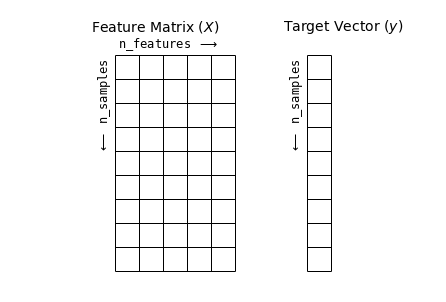

In [ ]:
# Cell 20 from 06.00 Figure Code
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2);

# Relating model score, $R^2$ & MSE

* The API reference doc for [sklearn.linear_model.LinearRegression](sklearn.linear_model.LinearRegression) indicates that [`model.score()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) returns $R^2$ defined as $(1 - u/v)$ where $u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
* ISLR2 talks about $\mathrm{MSE}  = \frac{u}{n} = (1 - R^2) * \frac{v}{n}$

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
# Cell 11 from 05.03-Hyperparameters-and-Model-Validation.ipynb
# Modified only by adding default N=30 (as in appendix)
import numpy as np

def make_data(N=30, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

(40, 1) (40,)
(40,)


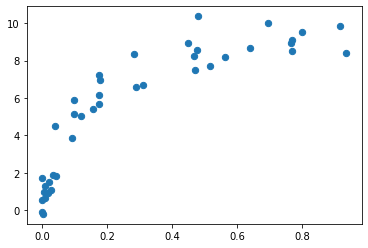

In [ ]:
print(X.shape, y.shape)
print(X.ravel().shape)
#plt.plot(X.ravel(), y) -- this creates a bunch of squiggles
plt.scatter(X.ravel(), y, s=40);

(1000, 1) (1000, 6)


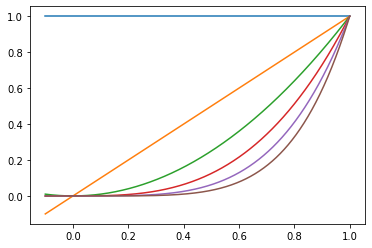

In [ ]:
degree = 5

polynomialFeatures = PolynomialFeatures(degree)

xfit = np.linspace(-0.1, 1.0, 1000)[:, None]

features = PolynomialFeatures(degree).fit_transform(xfit)
print(xfit.shape, features.shape)

plt.plot(xfit, features);

(40, 1) (40, 6)


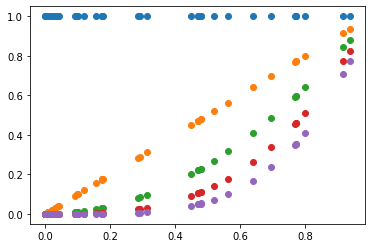

In [ ]:
polynomialFeatures = PolynomialFeatures(degree)

features = PolynomialFeatures(degree).fit_transform(X)
print(X.shape, features.shape)

for i in range(degree):
    plt.scatter(X.ravel(), features[:,i])

## Train the model

ISLR2 Equation (2.4) on p21

$$
f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p
$$
We have to find the $p$ coefficients $\beta_i$, where $p=$degree.

(500, 1) (500,)


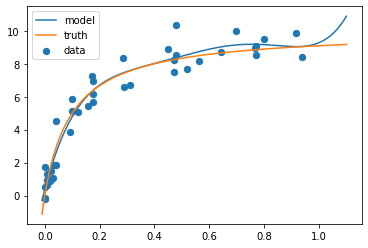

In [ ]:
model = LinearRegression().fit(features, y)

X_test = np.linspace(-.01, 1.1, 500)[:, None]
features_test = PolynomialFeatures(degree).fit_transform(X_test)
y_test = model.predict(features_test)

print(X_test.shape, y_test.shape)
plt.scatter(X.ravel(), y, s=40, label='data')
plt.plot(X_test.ravel(), y_test, label='model')
plt.plot(X_test.ravel(), 10 - 1. / (X_test.ravel() + 0.1), label='truth')
plt.legend();